In [ ]:
import pandas as pd

# Carregar as planilhas
dados_julho = pd.read_excel('julho.xlsx')
dados_agosto = pd.read_excel('Agosto.xlsx')
dados_setembro = pd.read_excel('Setembro.xlsx')

# Combinar os três DataFrames em um único
dados = pd.concat([dados_julho, dados_agosto, dados_setembro], ignore_index=True)


print(dados.head())


       Data   Cliente    Veiculo  Valor
0 2024-07-01    Patão  Fiat toro     50
1 2024-07-01  Lidiane        Fox     35
2 2024-07-01   Wilian       Onix     25
3 2024-07-01   Wilian      Astra     25
4 2024-07-02     Alan    Saveiro     45


In [ ]:
# Remover espaços nos nomes das colunas
dados.columns = dados.columns.str.strip()


dados['Data'] = pd.to_datetime(dados['Data'], errors='coerce')

# Excluir linhas com valores nulos na coluna 'Data'
dados = dados.dropna(subset=['Data'])


print(dados.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     178 non-null    datetime64[ns]
 1   Cliente  178 non-null    object        
 2   Veiculo  178 non-null    object        
 3   Valor    178 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.7+ KB
None


Data
2024-07-01    4
2024-07-02    3
2024-07-03    3
2024-07-04    3
2024-07-05    3
             ..
2024-10-01    5
2024-10-02    2
2024-10-03    4
2024-10-04    3
2024-10-05    2
Length: 63, dtype: int64


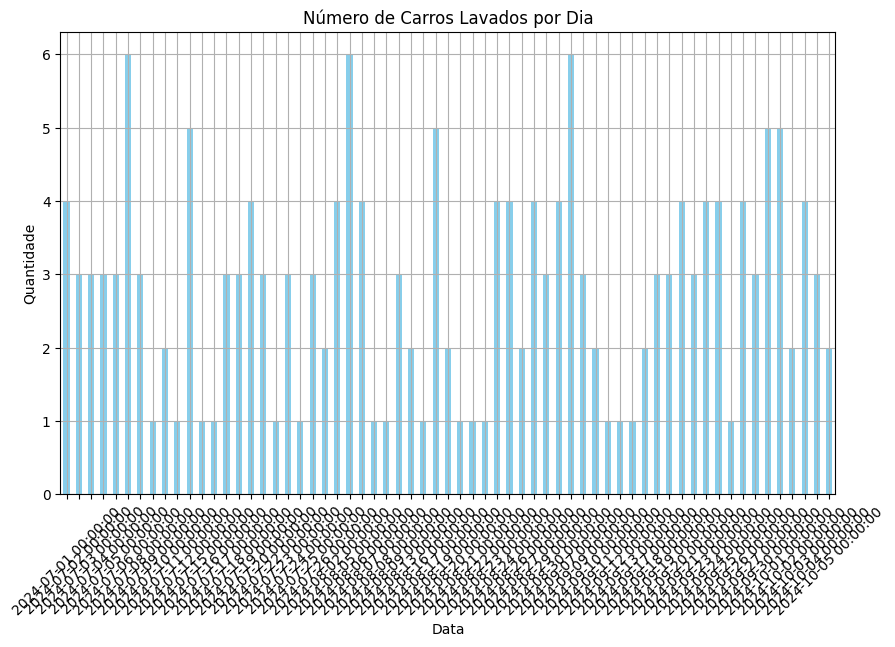

In [ ]:
# Agrupar os dados por dia
movimento_diario = dados.groupby('Data').size()

print(movimento_diario)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
movimento_diario.plot(kind='bar', color='skyblue')
plt.title('Número de Carros Lavados por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


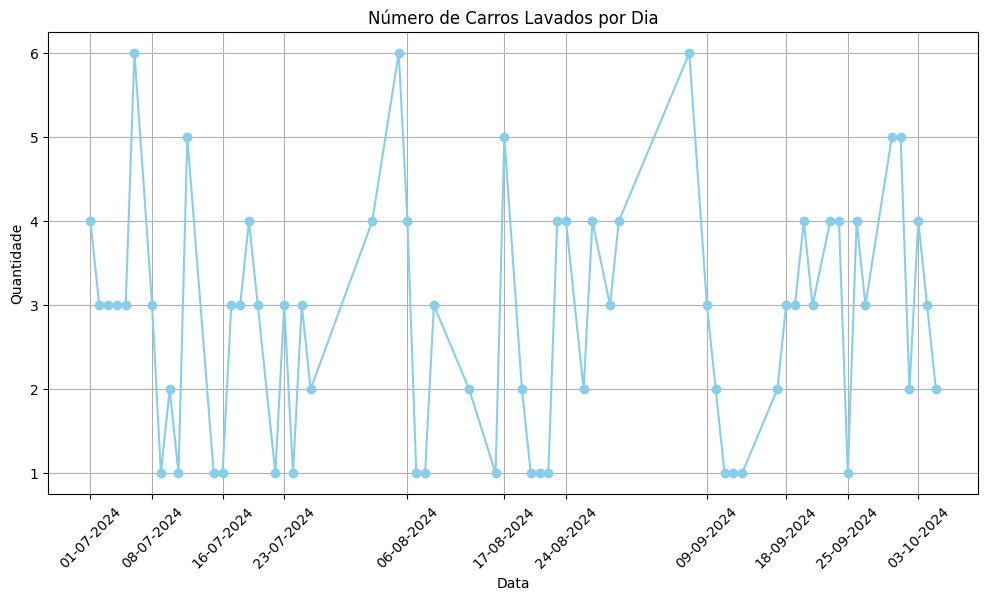

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(movimento_diario, marker='o', linestyle='-', color='skyblue')

plt.title('Número de Carros Lavados por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.grid(True)

# Rotacionar os rótulos das datas no eixo x e definir um intervalo maior para exibição
plt.xticks(rotation=45)

# Mostrar rótulos das datas em intervalos específicos para evitar sobrecarga
step_size = max(1, len(movimento_diario) // 10)
plt.xticks(ticks=movimento_diario.index[::step_size], labels=movimento_diario.index[::step_size].strftime('%d-%m-%Y'))

plt.show()


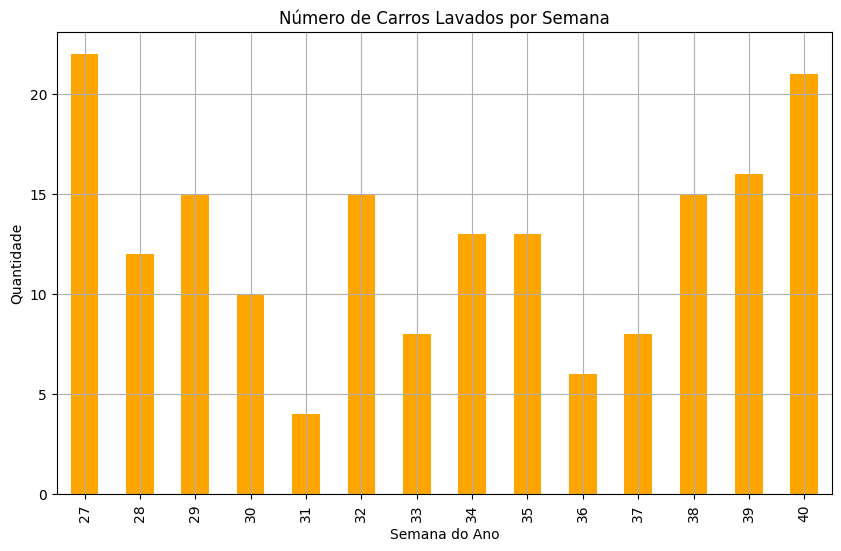

In [ ]:
# Extrair a semana do ano a partir da coluna 'Data'
dados['Semana'] = dados['Data'].dt.isocalendar().week

# Agrupar por semana e contar o número de carros lavados
movimento_semanal = dados.groupby('Semana').size()


plt.figure(figsize=(10, 6))
movimento_semanal.plot(kind='bar', color='orange')
plt.title('Número de Carros Lavados por Semana')
plt.xlabel('Semana do Ano')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()


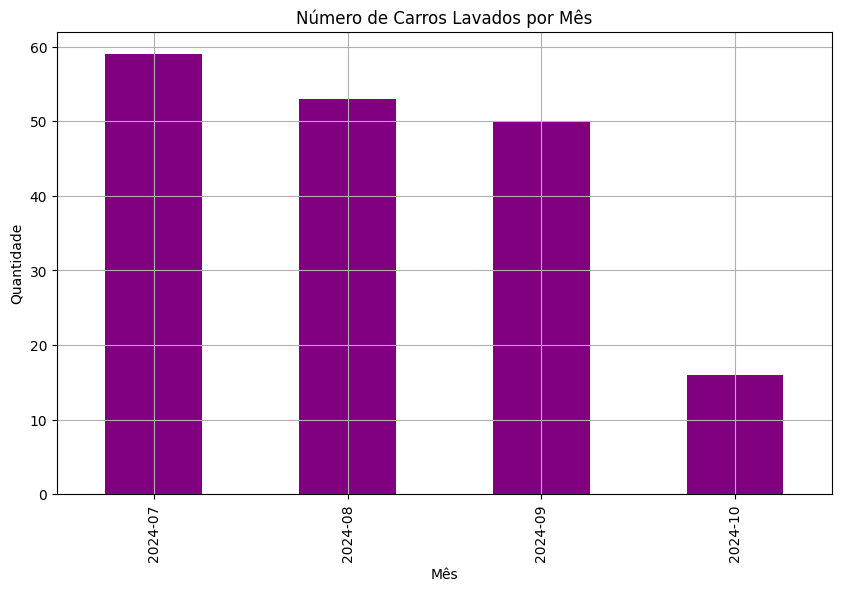

In [ ]:
# Agrupar por mês e contar o número de carros lavados
movimento_mensal = dados.groupby(dados['Data'].dt.to_period('M')).size()


plt.figure(figsize=(10, 6))
movimento_mensal.plot(kind='bar', color='purple')
plt.title('Número de Carros Lavados por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()


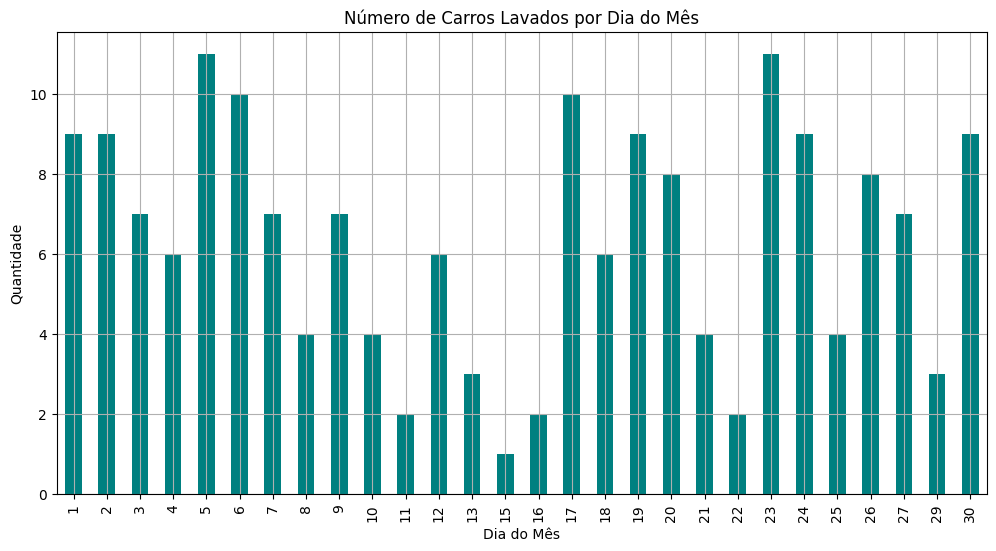

In [ ]:
# Extrair o dia do mês
dados['Dia do Mês'] = dados['Data'].dt.day

# Agrupar por dia do mês e contar o número de carros lavados
movimento_por_dia_do_mes = dados.groupby('Dia do Mês').size()


plt.figure(figsize=(12, 6))
movimento_por_dia_do_mes.plot(kind='bar', color='teal')
plt.title('Número de Carros Lavados por Dia do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()
